# Trained in Rtx 4080 16GB, max iter 200000, LR Schedule, AMP(bfloat16) + torch.compile(), Imagenet100 dataset

In [4]:
import sys; sys.path.insert(0, '..')
from src.models.vgg_v3 import minVGG,Config

config = Config()
model = minVGG(config)

params = sum([p.numel() for p in model.parameters()])
print(params / 10**6)

8.640532


Min Train Loss: 0.144531
Min Validation Loss: 2.6485


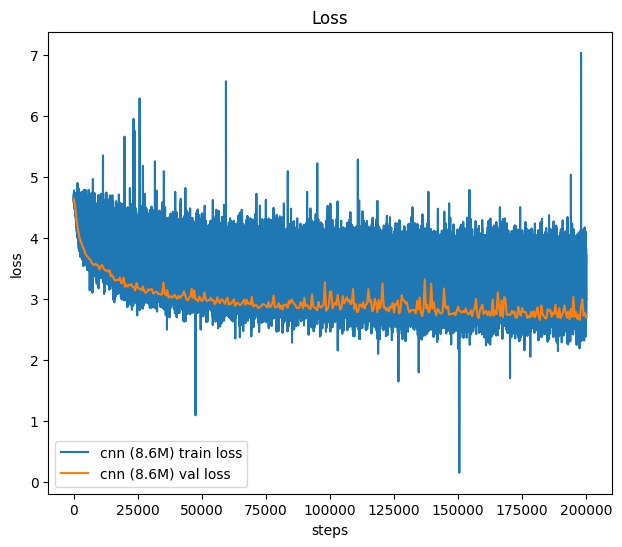

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sz = "8.6M"




with open("/home/samitha/Projects/miniVGG/log/log.txt", "r") as f:
    lines = f.readlines()

streams = {}
for line in lines:
    step, stream, val = line.strip().split()
    if stream not in streams:
        streams[stream] = {}
    streams[stream][int(step)] = float(val)

streams_xy = {}
for k, v in streams.items():
    xy = sorted(list(v.items()))
    streams_xy[k] = list(zip(*xy))

plt.figure(figsize=(16, 6))

# losses: both train and val
plt.subplot(121)
xs, ys = streams_xy["train"] # training loss
ys = np.array(ys)
plt.plot(xs, ys, label=f'cnn ({sz}) train loss')
print("Min Train Loss:", min(ys))
xs, ys = streams_xy["val"] # validation loss
plt.plot(xs, ys, label=f'cnn ({sz}) val loss')


plt.xlabel("steps")
plt.ylabel("loss")
# plt.yscale('log')
# plt.ylim(top=5.0)
plt.legend()
plt.title("Loss")
print("Min Validation Loss:", min(ys))

In [9]:
x,y = streams_xy["val"]
m = min(y)
y.index(m)

364

In [10]:
364 * 500

182000

In [11]:
y[-1]

2.6936

In [12]:
y[364]

2.6485